<a href="https://colab.research.google.com/github/Link03783/machineLearning/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris 
iris =load_iris() 
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

In [3]:
wcss=[] 
for i in range(1,11): 
         kmeans = KMeans(n_clusters=i,random_state=11) 
         kmeans.fit(iris.data) 
         wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

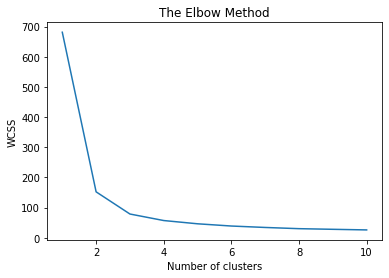

In [4]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS') 
plt.title('The Elbow Method')
plt.show

In [5]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784')

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(mnist.data,mnist.target,random_state=11)

In [7]:
X_train.shape

(52500, 784)

In [8]:
X_test.shape

(17500, 784)

In [9]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler() 
print(scaler.fit(mnist.data)) 

StandardScaler()


In [10]:
print(scaler.mean_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.80000000e-03 6.71428571e-03 3.08571429e-03 1.28571429e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.28571429e-04 1.32857143e-03 1.13285714e-02 2.30714286e-02
 4.32285714e-02 6.22428571e-02 1.17928571e-01 1.71242857e-01
 1.93414286e-01 1.90085714e-01 2.06285714e-01 1.82742857e-01
 1.70100000e-01 1.44514286e-01 9.92428571e-02 6.82285714e-02
 4.88714286e-02 1.83142857e-02 8.64285714e-03 3.02857143e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.14285714e-04 6.00000000e-04
 5.95714286e-03 1.09428571e-02 5.63000000e-02 1.39385714e-01
 2.68228571e-01 5.209857

In [11]:
print(scaler.transform(mnist.data))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

In [13]:
from sklearn.decomposition import PCA 
import seaborn as sns
import pandas as pd
pca= PCA(n_components=2,random_state=11)

In [14]:
pca.fit(mnist.data)

PCA(n_components=2, random_state=11)

In [15]:
pca.fit_transform(mnist.data)

array([[ 122.25451111, -316.21644372],
       [1010.49496956, -289.94392985],
       [ -58.99941291,  393.66904934],
       ...,
       [-271.50561932,  590.09805317],
       [-310.22430751, -116.74853137],
       [1058.86340102,  -83.37321937]])

In [16]:
mnist_pca=pca.transform(mnist.data)

In [17]:
mnist_pca.shape

(70000, 2)

In [18]:
mnist_pca_df=pd.DataFrame(mnist_pca, columns=['Componet 1','Componet 2']) 

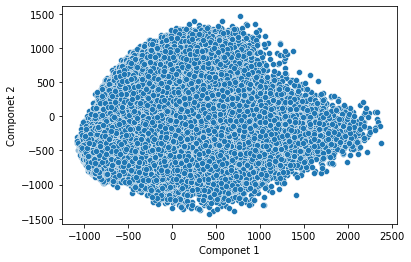

In [19]:
axes=sns.scatterplot(data=mnist_pca_df,x='Componet 1',y='Componet 2')

In [20]:
from sklearn.linear_model import LogisticRegression 